#HYPOTHESIS TESTING

Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

Importing the data

In [2]:
data=pd.read_csv("Cutlets.csv")
data.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


checking for null values & duplicates

In [3]:
data.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [4]:
data[data.duplicated()].shape

(0, 2)

In [5]:
data[data.duplicated()]

,Unit A,Unit B


F&B manager wants to determine whether there is a significant difference in the diameter of cutlets between 2 units. A randomly collected samples of cutlets collected from both units and measured. Analyze the data and draw inferences at 5% significance level.

so here we have to do two independent sample t-test , Since we dont have informations about population

considering Cutlets data

#Null Hypothesis: μ1=μ2
#Alternative Hypthosis:  μ1≠μ2

2-sample independentt-test

Computing t-statistic and P-value

In [6]:
t_statistic, p_value = stats.ttest_ind(data['Unit A'],data['Unit B'])
t_statistic, p_value

(0.7228688704678063, 0.4722394724599501)

Since the p-value is greater than alpha,0.05(5% level of significance), we fail to reject the null hypothesis. That is there is no significant difference in diameter of cutlets.

#Visualization of 2 means

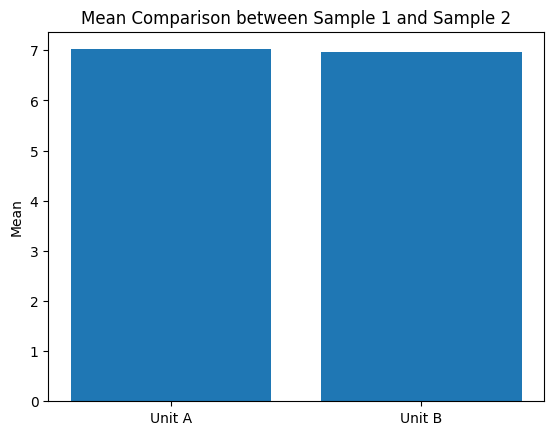

In [7]:
labels = ['Unit A', 'Unit B']
means = [data['Unit A'].mean(), data['Unit B'].mean()]
plt.bar(labels, means)
plt.ylabel('Mean')
plt.title('Mean Comparison between Sample 1 and Sample 2')
plt.show()

Visualisation of variability in data

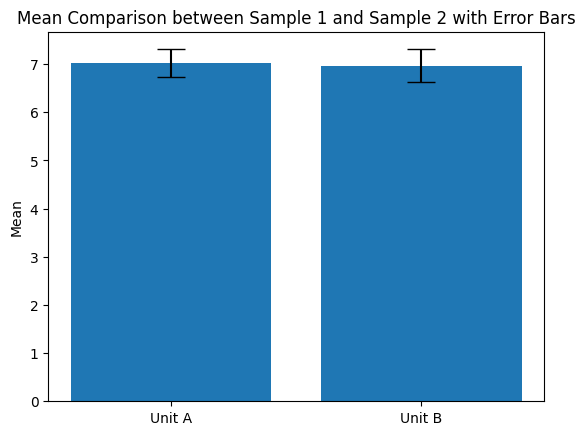

In [8]:
std_errors = [data['Unit A'].std(), data['Unit B'].std()]

plt.bar(labels, means, yerr=std_errors, capsize=10)
plt.ylabel('Mean')
plt.title('Mean Comparison between Sample 1 and Sample 2 with Error Bars')
plt.show()

#problem 2

Importing data

In [9]:
tat_data=pd.read_csv('LabTAT.csv')
tat_data.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


Checking for null values and duplicates

In [10]:
tat_data.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [11]:
tat_data[tat_data.duplicated()].shape

(0, 4)

In [12]:
tat_data[tat_data.duplicated()]

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4


A hospital wants to determine whether there is any difference in the average turn away time (TAT) of reports of the laborataries in their preferred list. They collected a random sample and collected TAT for the reports of 4 laborataries.TAT is defined as sample collected to report disPatch. Analyze the data and determine whether there is a differece in average TAT among laborataries at 5% level of significane

Here, we have to do ANOVA

#Null Hypothesis: μ1=μ2=μ3=μ4

#Alternative Hypthosis: atleast one μ is different

In [13]:
a=tat_data.iloc[:,0]
b=tat_data.iloc[:,1]
c=tat_data.iloc[:,2]
d=tat_data.iloc[:,3]

In [14]:
f_statistic, p_value = stats.f_oneway(a,b,c,d)
f_statistic, p_value

(118.70421654401437, 2.1156708949992414e-57)

Since the p-value is less than alpha,0.05(5% level of significance), we reject the null hypothesis. That is the TAT significantly different for laborataries

Visualize the results using a box plot to compare the distributions of the four groups.

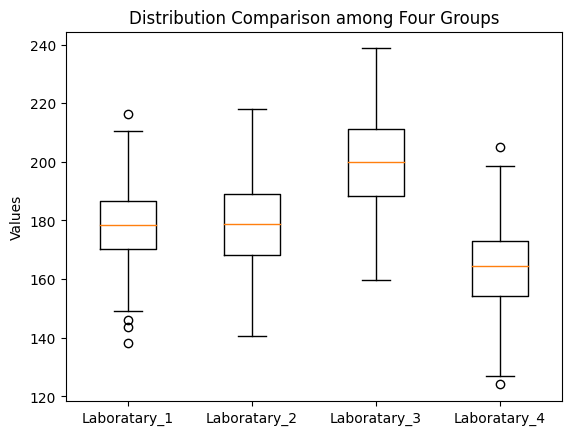

In [15]:
data = [a,b,c,d]

plt.boxplot(data, labels=['Laboratary_1', 'Laboratary_2', 'Laboratary_3', 'Laboratary_4'])
plt.ylabel('Values')
plt.title('Distribution Comparison among Four Groups')
plt.show()

#Problem 3

Importing the data

In [16]:
buyer_data=pd.read_csv('BuyerRatio.csv',index_col = 0)
buyer_data

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


Checking for null values

In [17]:
buyer_data.isnull().sum()

East     0
West     0
North    0
South    0
dtype: int64

sales of products in 4 different regions is tabulated for male and female. Find if male-female buyer ratios are similar across region

Here, we have to do chi-square test since the data is categorical and there are more than 2 categories

Null Hypothesis: all proportions are equal
Alternative Hypothesis:Not all proportions are equal


Null Hypothesis : There is no significant difference between male-female buyer ratio across the regions

Alternate Hypothesis : There is a significant difference in male female buyer ratio across the regions

In [18]:
table = [[50,142,131,70],
        [435,1523,1356,750]]

In [19]:
stat, p, dof, exp = stats.chi2_contingency(buyer_data)
print(stat,"\n", p,"\n", dof,"\n", exp)

1.595945538661058 
 0.6603094907091882 
 3 
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [20]:
stats.chi2_contingency(table)

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [21]:
observed = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299,  146.81287862,  131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 747.69575948])

Since the p-value is greater than 0.05, we failed to rejet the null hypothesis. That is, there is no the male-female buyer ratios are similar

#Problem 4

Importing the data

In [22]:
cust_data=pd.read_csv('Costomer+OrderForm.csv')
cust_data.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


Checking for null value

In [23]:
cust_data.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain % of the customer order forms. Any error in order form renders it defective and has to be reworked before processing. The manager wants to check whether the defective % varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

Creating contigency table

In [24]:
contingency_table = [[271,267,269,280],
                    [29,33,31,20]]
print(contingency_table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


In [25]:
stat, p, df, exp = stats.chi2_contingency(contingency_table)
print("Statistics = ",stat,"\n",'P_Value = ', p,'\n', 'degree of freedom =', df,'\n', 'Expected Values = ', exp)

Statistics =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [26]:
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

since the p-value is greater than 0.05(5% level of significance), we fail to reject the null hypothesis.